a0 is -11.34 ± 0.04
a1 is 0.27 ± 0.00
        χ2 is 18464.1811563 
Reduced χ2 is 68.3858561345
The fit is not very good.


Bootstrapped a0 is -11.354 ± 0.382
Bootstrapped a1 is 0.268 ± 0.009
Jackknived a0 is -11.373 ± 0.049
Jackknived a1 is 0.268 ± 0.001


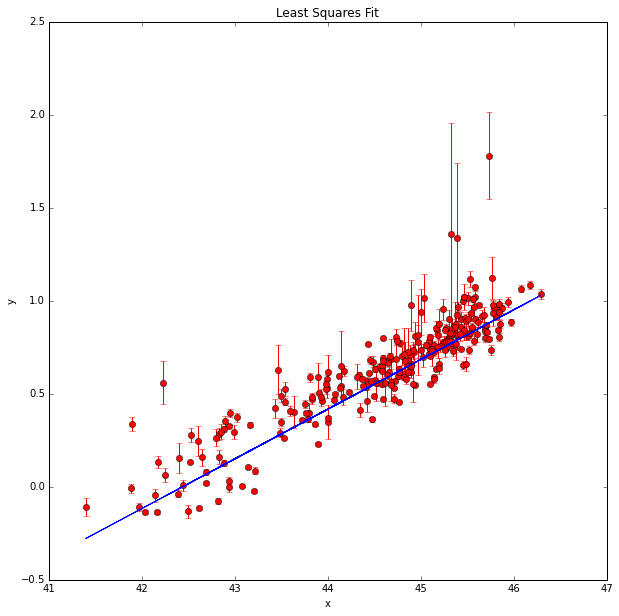

In [1]:
"""
         1         2         3         4         5         6         7      
1234567890123456789012345678901234567890123456789012345678901234567890123456
"""

"""
Cordell Newmiller
Prof. Fassnacht
PHY 266
Homework 5
Problem 1

On the course smartsite, you can find a file called “lx t.dat” under 
Resources → Homework → Data. The data file contains 3 columns, 
(1) X-ray luminosity in erg/s, 
(2) X-ray temperature in keV, 
(3) error on X-ray temperature. 
First, set xi = log10(LX) and yi = log10(TX).
"""

import numpy
import CJN_Functions as my
from matplotlib import pyplot
%matplotlib inline

loadingdata=numpy.loadtxt('lx_t.dat')
data=numpy.zeros(loadingdata.shape)
data[:,0]=numpy.log10(loadingdata[:,0])   # luminosity
data[:,1]=numpy.log10(loadingdata[:,1]) # temperature
data[:,2]=loadingdata[:,2]/(loadingdata[:,1]*numpy.log(10))  
# propogate temperature error 


"""
(a) Do the fitting of a straight line to the data, y = a0 + a1x using the 
weighted version of the fitting with the curvature matrix, etc. Give your 
derived values for a0 and a1.


(b) Calculate a χ2 statistic for the fit and the reduced χ2 (i.e., χ2ν). 
State whether this is a good fit or not.
"""

# PolynomialFit is a generalized version of hw4p2, see the 
# CJN_Function file for details.
ymodel,parameters,psigmas,chisquared,reducedchisquared = (
    my.PolynomialFit(data[:,0],data[:,1],data[:,2],2,True))

"""
(c) Write your own code to calculate the bootstrap error. Give the errors 
that you calculate, via the bootstrap method, on the slope and intercept of 
your linear fit to this dataset.
"""

# Page 147 in Wall
repeats=1000
bootstraps=numpy.zeros([repeats,parameters.size])

for i in range(repeats):
    elements=numpy.random.choice(data.shape[0],repeats)  
    # N integers between 0 and N-1
    
    _,bootstraps[i,:],_,_,_=(my.PolynomialFit(data[elements,0],
                            data[elements,1],data[elements,2],2))
    
bmeans=bootstraps.mean(axis=0)
bstds=bootstraps.std(axis=0)

print("\n")
for i in range(bmeans.size):
    print("Bootstrapped a%s is %2.3f ± %2.3f" % (i, bmeans[i], bstds[i]))

"""
(d) Write your own code to calculate the jackknife estimates of the 
parameters. Give the jackknife estimate for a0 and a1.

"""

N=data.shape[0]
jackknives=numpy.zeros([N,parameters.size])

for i in range(N):
    elements= numpy.concatenate((numpy.arange(0,i),
                                 numpy.arange(i+1,N)))
    _,partials,_,_,_=(my.PolynomialFit(data[elements,0],
                            data[elements,1],data[elements,2],2))
    jackknives[i,:] = N*parameters - (N-1)*partials

jmeans=jackknives.mean(axis=0)
jstds=jackknives.std(axis=0)/(N-1)
# This follows from equation 6.18 on page 149 of Wall.

for i in range(bmeans.size):
    print("Jackknived a%s is %2.3f ± %2.3f" % (i, jmeans[i], jstds[i]))
    
# End of problem 1
